# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)


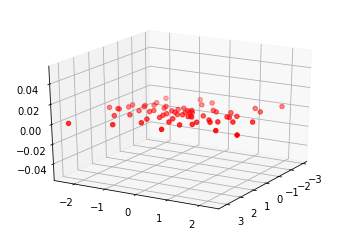

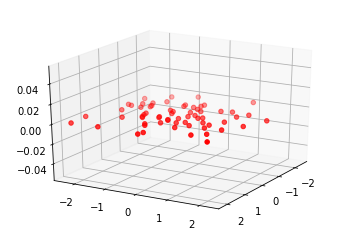

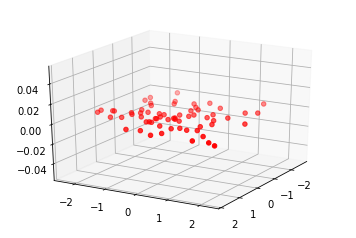

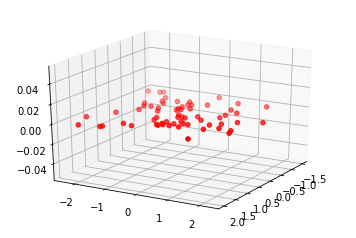

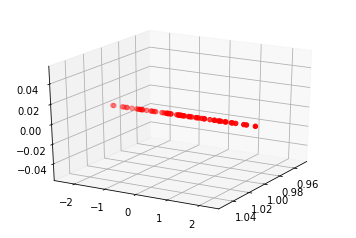

In [162]:
import numpy as np
np.warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.random.randn(4,64)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.random.randn(64)


for index, np_array in enumerate(x):
    if index < len(x.T):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(23, 30)
        ax.scatter(x.T[index], y, zdir='z', c='r')
        print(fig)



    
    
    
   

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [163]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
beta = np.dot(left, right)

print(right)
print(left)
print(beta)

[-17.89295222   3.14936286  14.42326991   3.39140895 -12.30861914]
[[ 0.0150527   0.00390433 -0.00305523  0.00446507 -0.00091556]
 [ 0.00390433  0.01575172  0.00025808 -0.00094911  0.00084603]
 [-0.00305523  0.00025808  0.01496104  0.00068711  0.00201285]
 [ 0.00446507 -0.00094911  0.00068711  0.02293804 -0.00528972]
 [-0.00091556  0.00084603  0.00201285 -0.00528972  0.01719666]]
[-0.27469529 -0.0301621   0.24882179  0.06992943 -0.18152823]


## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

[-0.5720941  -0.38111809 -0.40764074  0.50066274 -0.32042538 -0.32644179
 -0.59919781 -0.32619558 -1.12701497 -0.40182229 -0.16359414 -0.28948547
  0.27049832 -0.45026039 -0.77297884 -0.51153857  0.09450326 -0.3232093
  0.24502731 -0.33704961  0.04961593  0.17004382 -0.22092678  0.05045144
 -0.11237741 -0.5781343  -0.41774533 -0.88991427 -0.32621739  0.13025713
 -0.32544862 -0.11908192 -0.48507774 -0.30497036  0.08280616 -0.13398027
 -0.17212076 -0.50038633  0.15357864  0.38777843  0.48857992 -0.59382615
  0.38105966 -0.31287943 -0.08699377  0.00201545  0.17105593  0.36019618
  0.47573013 -0.33156489 -0.49948389 -0.13422635  0.34338822 -0.32232919
  0.32984158  0.26798169 -0.89386191 -0.60916991 -0.65993757 -0.34061172
 -0.14867946 -0.06151375  0.01583813 -0.38800266]


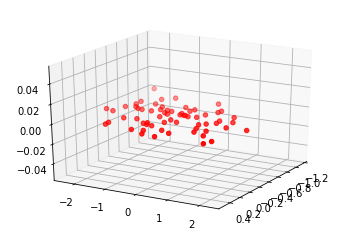

In [164]:
pred = np.dot(x, beta)
print(pred)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(pred.T, y, zdir='z', c='r')


## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [165]:
import pandas as pd
credit = pd.read_csv('../data/Credit.csv')
print(credit.head(10))

   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   
5           6   80.180   8047     569      4   77         10    Male      No   
6           7   20.996   3388     259      2   37         12  Female      No   
7           8   71.408   7114     512      2   87          9    Male      No   
8           9   15.125   3300     266      5   66         13  Female      No   
9          10   71.061   6819     491      3   41         19  Female     Yes   

  Married         Ethnicity  Balance  
0     Yes         Caucasian      333  
1     Yes             Asian      903  
2 

In [166]:
# Create features for model. 
X = credit[['Income', 'Limit','Cards','Age']].as_matrix()
X = np.vstack([X.T, np.ones(len(X))]).T


In [167]:
y = credit['Rating']
beta = np.linalg.lstsq(X,y)[0]
pred = np.dot(X, beta)

print(pred.shape)

(400,)


### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

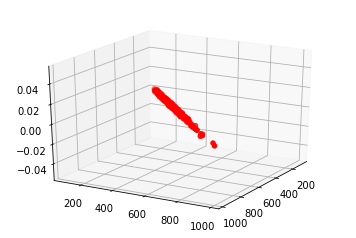

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(pred.T, y, zdir='z', c='r')